In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold,train_test_split
from sklearn.metrics import precision_score,confusion_matrix

In [26]:
df=pd.read_csv("heart.csv")

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df.isnull().sum()
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [29]:
c_list=['sex', 'cp','fbs', 'restecg','exang','slope', 'ca', 'thal', 'target']
num_list=['age','trestbps', 'chol','thalach','oldpeak']

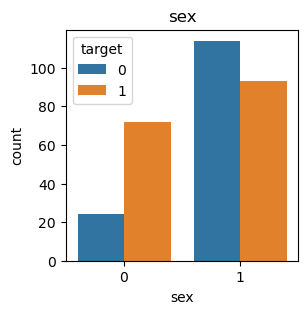

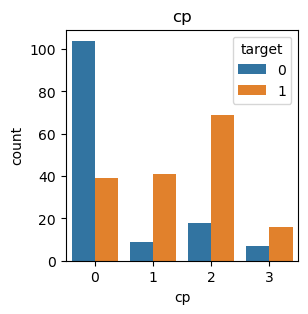

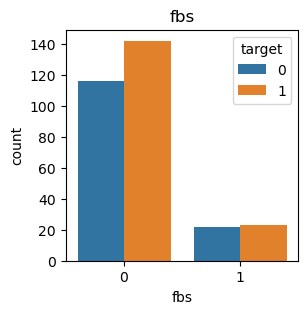

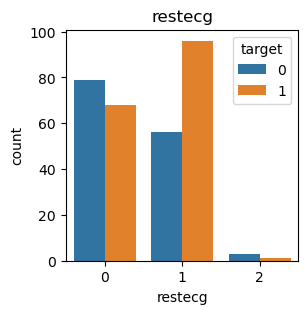

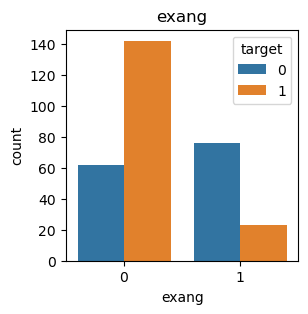

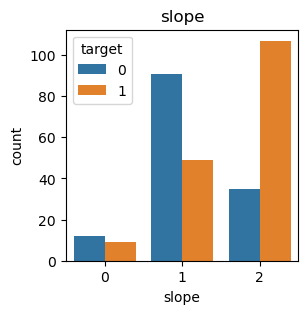

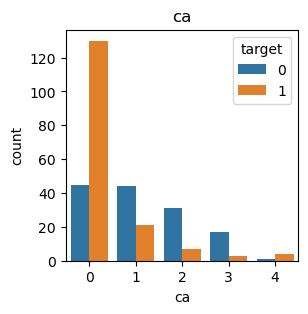

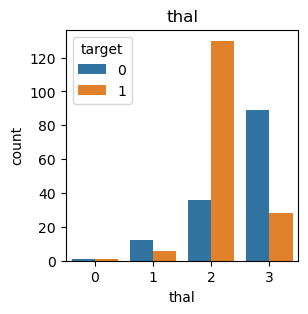

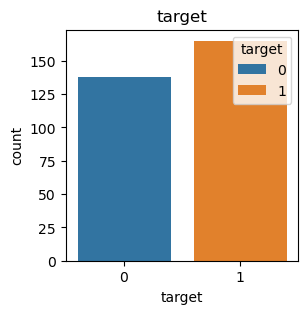

In [30]:
df_c=df.loc[:,c_list]
for i in c_list:
    plt.figure(figsize=(3,3))
    sns.countplot(x=i,data=df_c,hue="target")
    plt.title(i)

In [31]:
scaler=StandardScaler()
sc_array=scaler.fit_transform(df[num_list])
df_dummy=pd.DataFrame(sc_array,columns=num_list[:])
df_dummy

,age,trestbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244
...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373
300,1.503641,0.706843,-1.029353,-0.378132,2.036303
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373


In [32]:
df_dummy=pd.concat([df_dummy,df.loc[:,"target"]],axis=1)
df_dummy

,age,trestbps,chol,thalach,oldpeak,target
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1
...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0


<function matplotlib.pyplot.show(close=None, block=None)>

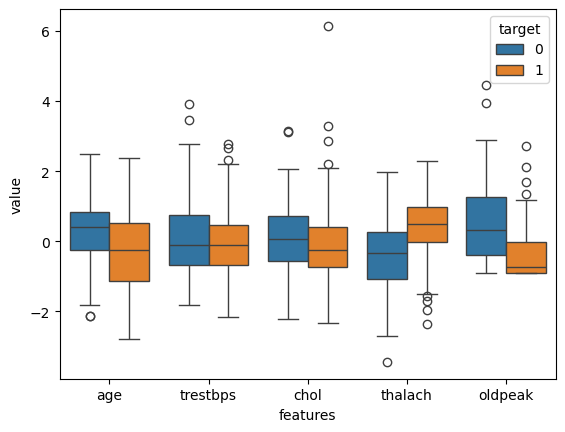

In [33]:
#görselleştirme
data_melted=pd.melt(df_dummy,id_vars="target",var_name="features",value_name="value")
#boxplot
plt.figure()
sns.boxplot(x="features",y="value",hue="target",data=data_melted)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

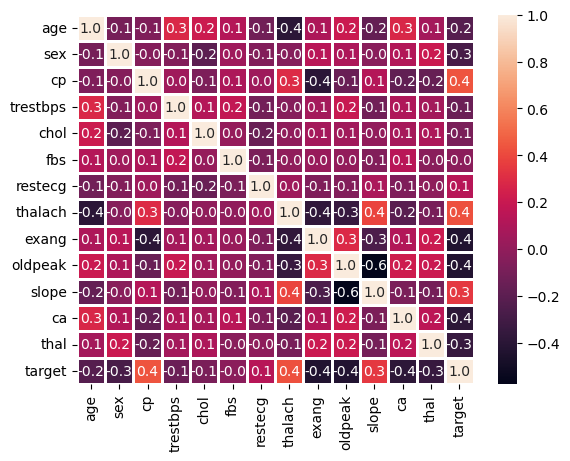

In [34]:
#cor
plt.figure()
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=0.8)
plt.show


In [35]:
for i in num_list:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 2.5 * IQR
    upper_bound = Q3 + 2.5 * IQR

    # Aykırı değerleri alt ve üst sınırlarla baskıla
    df[i] = df[i].clip(lower=lower_bound, upper=upper_bound)


In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


In [38]:
#kategorik verileri numariğe çevirme
df1=df.copy()
df1=pd.get_dummies(df1,columns=c_list[:-1],drop_first=True,dtype=int)

X=df1.drop(["target"],axis=1)
y=df1[["target"]]

scaler=StandardScaler()
X[num_list[:]]=scaler.fit_transform(X[num_list[:]])

In [39]:
#train-test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
124,-1.694735,-2.164149,-0.944316,1.283627,-0.901636,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
72,-2.797624,-0.091218,-0.843497,2.289429,-0.901636,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
15,-0.481558,-0.667032,-0.541042,0.365287,0.488673,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
10,-0.040403,0.484596,-0.137768,0.452748,0.141096,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
163,-1.805024,0.369433,-1.428244,1.021244,-0.901636,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.481558,0.484596,-0.258751,0.583939,-0.380270,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
71,-0.371269,-2.164149,-0.379733,0.190365,-0.901636,1,0,1,0,0,...,1,0,1,1,0,0,0,0,0,1
106,1.613930,1.636225,-0.238587,-0.815437,-0.814742,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
270,-0.922713,-0.667032,0.063868,-0.246940,-0.206482,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [40]:
log=LogisticRegression()
log.fit(X_train,y_train)
#olasılık değeri verir
#y_prob=log.predict_proba(X_test)
#y_pred=np.argmax(y_prob,axis=1)
y_pred=log.predict(X_test)
sc=accuracy_score(y_test,y_pred)
sc

C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8681318681318682

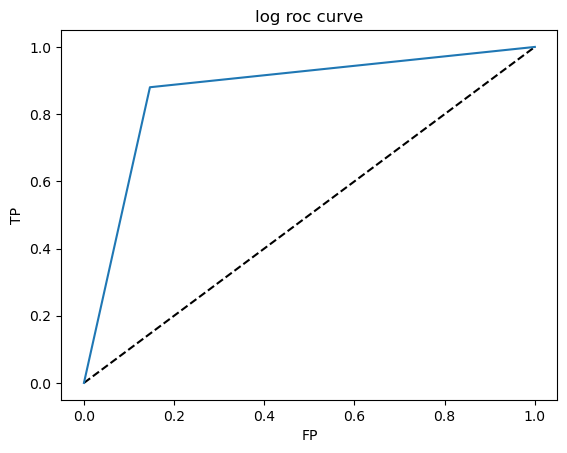

In [41]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Lo")
plt.xlabel("FP")
plt.ylabel("TP")
plt.title("log roc curve")
plt.show()

In [42]:
log=LogisticRegression()
penalty=["l1","l2"]
parameters={"penalty":penalty}
lr=GridSearchCV(log,parameters)
lr.fit(X_train,y_train);
lr.best_params_

C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'penalty': 'l2'}

In [43]:
y_pred=lr.predict(X_test)
sc_b=accuracy_score(y_test,y_pred)
sc_b

0.8681318681318682

In [44]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
result=model.predict(X_test)
sc=precision_score(y_test,result)
cf=confusion_matrix(y_test,result)
sc
cf
model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)
result=model.predict(X_test)
sc=precision_score(y_test,result)
cf=confusion_matrix(y_test,result)
sc
cf
model_params={
    "rf":
    {
        "model":RandomForestClassifier(),
        "params":
        {
            "n_estimators": [10,50,100],
            "max_features": ["sqrt","log2"],
            "max_depth":list(range(1,24,3))
        }
    },
    "DT":
    {
        "model":DecisionTreeClassifier(),
        "params":
        {
            "min_samples_split": [2, 5, 10],
            "max_features": ["sqrt","log2"],
            "max_depth":list(range(1,24,3))
        }
    }
}
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in model_params.items():
    rs=RandomizedSearchCV(params["model"],params["params"],cv=cv,n_iter=10)
    rs.fit(X_train,y_train)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])

# Sonuçları yazdır
for score in scores:
    print(f"Model: {score[0]}, Best Params: {score[1]}, Best Score: {score[2]}")

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

Model: rf, Best Params: {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 16}, Best Score: 0.8114617940199335
Model: DT, Best Params: {'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 10}, Best Score: 0.7147840531561462
